In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [2]:
import os
notebook_path = os.path.abspath("double_descent_mtcars_reg.ipynb")
print(notebook_path)
csv_path = os.path.join(os.path.dirname(notebook_path), "data/mt_cars.csv")
print(csv_path)

/Users/jeanortega/PycharmProjects/pythonProject1/double_descent_mtcars_reg.ipynb
/Users/jeanortega/PycharmProjects/pythonProject1/data/mt_cars.csv


In [3]:
df = pd.read_csv(csv_path)

In [4]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Split X and y

In [5]:
TARGET_COL = "mpg"

In [6]:
NON_NUMERIC_COLS = ["model"]

In [7]:
y = df[TARGET_COL]
X = df.drop([TARGET_COL] + NON_NUMERIC_COLS,axis=1)

# Functions

In [8]:
random_state = 10 # For reproducibility
num_sampled_rows = 4
num_sampled_columns = 5

In [9]:
indices = np.random.choice(df.index, num_sampled_rows, replace=False)

In [10]:
# X_subset = X.sample(n=num_sampled_rows, random_state=random_state, axis=0)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

In [11]:
X_subset = X_subset.sample(n=num_sampled_columns, random_state=random_state, axis=1)

In [12]:
X_subset

,gear,hp,qsec,vs,drat
28,5,264,14.50,0,4.22
9,4,123,18.30,1,3.92
3,3,110,19.44,1,3.08
22,3,150,17.30,0,3.15


In [13]:
y_subset

28    15.8
9     19.2
3     21.4
22    15.2
Name: mpg, dtype: float64

# Split train and test and fit one model

TODO: Run this with the subsets not full data

In [14]:
#X= X_subset
#y= y_subset

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.50, random_state=42)

In [16]:
model = RandomForestRegressor()

In [17]:
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print("MAE: ", mean_absolute_error(y_valid, preds_valid))
print("RMSE: ", root_mean_squared_error(y_valid, preds_valid))

MAE:  1.6484374999999987
RMSE:  2.1430025519116853


In [18]:
model = linear_model.LinearRegression()

In [19]:
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print("MAE: ", mean_absolute_error(y_valid, preds_valid))
print("RMSE: ", root_mean_squared_error(y_valid, preds_valid))

MAE:  4.495948962157878
RMSE:  5.503421875972531


In [20]:
model = linear_model.Ridge(alpha=.5)

In [21]:
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print("MAE: ", mean_absolute_error(y_valid, preds_valid))
print("RMSE: ", root_mean_squared_error(y_valid, preds_valid))

MAE:  2.9910012844823486
RMSE:  3.5905385276849437


Functions needed to get rmse by num parameters sampled

In [22]:
def sample_rows_and_cols(X, y, num_sampled_rows: int, num_sampled_columns: int, random_state: int):
    indices = np.random.choice(df.index, num_sampled_rows, replace=False)
    X_subset = X.iloc[indices]
    y_subset = y.iloc[indices]
    X_subset = X_subset.sample(n=num_sampled_columns, random_state=random_state, axis=1)
    return X_subset, y_subset

In [23]:
random_state = 10 # For reproducibility
num_sampled_rows = 4
num_sampled_columns = 5

In [24]:
X_sub, y_sub = sample_rows_and_cols(X, y, num_sampled_rows, num_sampled_columns, random_state)

In [25]:
X_sub.shape, len(y_sub)

((4, 5), 4)

In [26]:
model = linear_model.Ridge(alpha=.5)

In [27]:
def split_and_calc_metric(X, y, test_size, metric_func, random_state):
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    metric = metric_func(y_valid, model.predict(X_valid))
    return metric

In [28]:
split_and_calc_metric(X_sub, y_sub, 0.5, root_mean_squared_error, random_state)

np.float64(5.875397988393388)

In [29]:
def sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns, test_size, metric_func, random_state):
    X_sub, y_sub = sample_rows_and_cols(X, y, num_sampled_rows, num_sampled_columns, random_state+1)
    metric = split_and_calc_metric(X_sub, y_sub, test_size, metric_func, random_state)
    return metric

In [30]:
def sample_it(num_sampled_column):
    return sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns, 0.5, root_mean_squared_error, random_state)

In [31]:
num_samples = 40
rmse_list = []
for num_sampled_columns in range(1, X.shape[1]-1):
    rmse_list.append((num_sampled_columns, [sample_it(num_sampled_columns) for _ in range(num_samples)]))

In [32]:
for key, values in rmse_list:
    the_mean = np.mean(values)
    print(f'num_cols: {key}, mean rmse: {the_mean:9.4f}')

num_cols: 1, mean rmse:    7.2760
num_cols: 2, mean rmse:    6.4455
num_cols: 3, mean rmse:   10.5310
num_cols: 4, mean rmse:    6.8735
num_cols: 5, mean rmse:   10.8484
num_cols: 6, mean rmse:    9.8522
num_cols: 7, mean rmse:    5.4284
num_cols: 8, mean rmse:    6.8766


# Using the package

In [33]:
from double_descent_dar import sample_eval

In [34]:
random_state = 10 # For reproducibility
num_sampled_rows = 10
num_sampled_columns = 5

In [35]:
X_sub, y_sub = sample_eval.sample_rows_and_cols(X, y, num_sampled_rows=num_sampled_rows, num_sampled_columns=num_sampled_columns, random_state=random_state, replace=False) 

In [36]:
X_sub

,gear,hp,qsec,vs,drat
20,3,97,20.01,1,3.70
22,3,150,17.30,0,3.15
0,4,110,16.46,0,3.90
30,5,335,14.60,0,3.54
21,3,150,16.87,0,2.76
3,3,110,19.44,1,3.08
14,3,205,17.98,0,2.93
24,3,175,17.05,0,3.08
11,3,180,17.40,0,3.07
27,5,113,16.90,1,3.77


In [37]:
y_sub

20    21.5
22    15.2
0     21.0
30    15.0
21    15.5
3     21.4
14    10.4
24    19.2
11    16.4
27    30.4
Name: mpg, dtype: float64

In [38]:
# model = RandomForestRegressor()
model = linear_model.LinearRegression()

In [39]:
my_metric = root_mean_squared_error
# my_metric = mean_absolute_error

In [40]:
train_proportion = 0.5
sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns, train_proportion, my_metric, random_state=1)

np.float64(7.308202420481995)

In [41]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, my_metric, random_state=1)

In [42]:
num_samples = 100
metric_all_samples = []
for num_sampled_columns in range(1, X.shape[1]-1):
    metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))

In [43]:
for key, values in metric_all_samples:
    the_mean = np.mean(values)
    print(f'num_cols: {key}, mean rmse: {the_mean:9.4f}')

num_cols: 1, mean rmse:    3.7858
num_cols: 2, mean rmse:    4.5757
num_cols: 3, mean rmse:    6.5632
num_cols: 4, mean rmse:   21.0947
num_cols: 5, mean rmse:    8.3871
num_cols: 6, mean rmse:   57.4328
num_cols: 7, mean rmse:    9.8003
num_cols: 8, mean rmse:    8.1102


In [44]:
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]

In [45]:
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]

In [46]:
my_metric.__name__

'root_mean_squared_error'

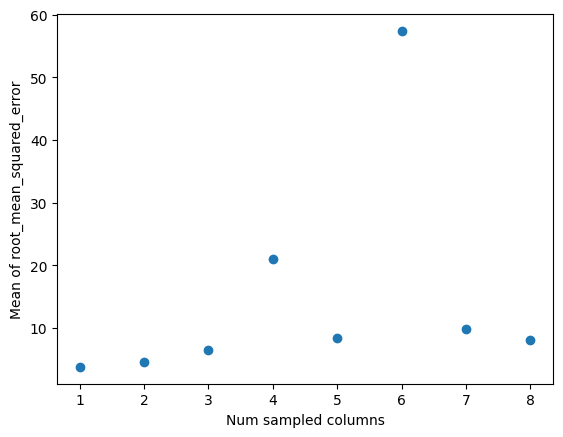

In [47]:
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()